**Question **

Your company is focused on how to make good predictions using different types of algorithms. This time it was requested that you
as a data scientist can contribute to the team knowledge regarding this subject. Bellow you can see the email that was sent to you.
“ Hi Daniel,
Our team loved the last presentation regarding Decision Trees and now we are super interested to understand the use of
logistic regression to solve ML problems.
Our team is planning a lunch and learn session on Nov.21st, and we will be more than happy to see a presentation
from you. Please feel free to bring any example that can add value to our knowledge on this topic.
Thanks for all your support.
Nick Dresser
Manager, DB Team“







**Solution **

Coronary artery disease is an illness that develops overtime, and sometimes patients do not notice any problems until it leads to a life threatening incident such as an hearth attack. Therefore being able to detect and predit this disease at an early stage have the potential to save millions of lives. 
Develop an machine learning (ML) model that can predict whether a patient is at risk of developing coronary hearth disease (CHD) within the next ten years. You have been provided with a dataset with patients' information. Demonstrate how you can employ logistics regression and the use of PCA for dimensionality reduction in your model development. 






Data source: The dataset is publically available at https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression?select=framingham.csv




**Libraries **

To solve this problem, I would now go ahead and import python libraries

Pandas: This library provides data structure and will be used for data analysis and manipulations.

Numpy: It will be used for computing with array objects.

Seaborn: This will be used for plotting. 

Matplotlib: This is an extention of Numpy and it will be used for ploting. 

Sklearn: This library is very vasatile in the development of machine learning models. It features various classification, regression and clustering algorithms including support vector machines, logistic regressor, principal component analysis (PCA), random forests, gradient boosting etc. 

In [ ]:
#importing python libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [ ]:
#loading dataset
HDdf = pd.read_csv('HDPrediction.csv')
HDdf.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# checking number of rows and columns 
HDdf.shape

(4238, 16)

In [ ]:
#checking data type
type(HDdf)

pandas.core.frame.DataFrame

In [ ]:
#sweetviz helps us see the attributes and characteristics of the dataset. The report is displayed in html
!pip install sweetviz
import sweetviz as sv

     |████████████████████████████████| 15.1MB 282kB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
HDdf_report=sv.analyze(HDdf)

In [ ]:
HDdf_report.show_html

<bound method DataframeReport.show_html of <sweetviz.dataframe_report.DataframeReport object at 0x7f3f4e21e4a8>>

In [ ]:
#checking the maths dataset for missing values
count_nan=HDdf.isnull().sum()
print(count_nan[count_nan>0])

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64


In [ ]:
#checking the dataset for duplicated values
count_dup=HDdf.duplicated().sum()
print(count_dup[count_dup>0])

[]


**Observations **


The dataset contains all numeric values. There is no need to transform any of the variables. 


The dataset have no duplicated rows. 


However, the dataset contains a number of missing values. I will now proceed to remove missing values from the dataset. There are a number of different ways to treat missing values, such as calculating mean values and substituting them for the missing values. but in this situation as we are dealining with health issues that have serious implications for false positive or negatives, I will be remove the missing values from the dataset. 

In [ ]:
#removing missing values and checking the number of rows left
HDdf_no_nan=HDdf.dropna()
HDdf_no_nan.shape

(3656, 16)

In [ ]:
#Just testing that all missing values have been removed
HDcount_nan=HDdf_no_nan.isnull().sum()
print(HDcount_nan[HDcount_nan>0])

Series([], dtype: int64)


**Seaborn Pairplot**


Seaborn pairplot will be used to get a general overview of the data distribution for all variables. The graph also provides information about the type of data in the variables, such as categorical data or continuous data. 

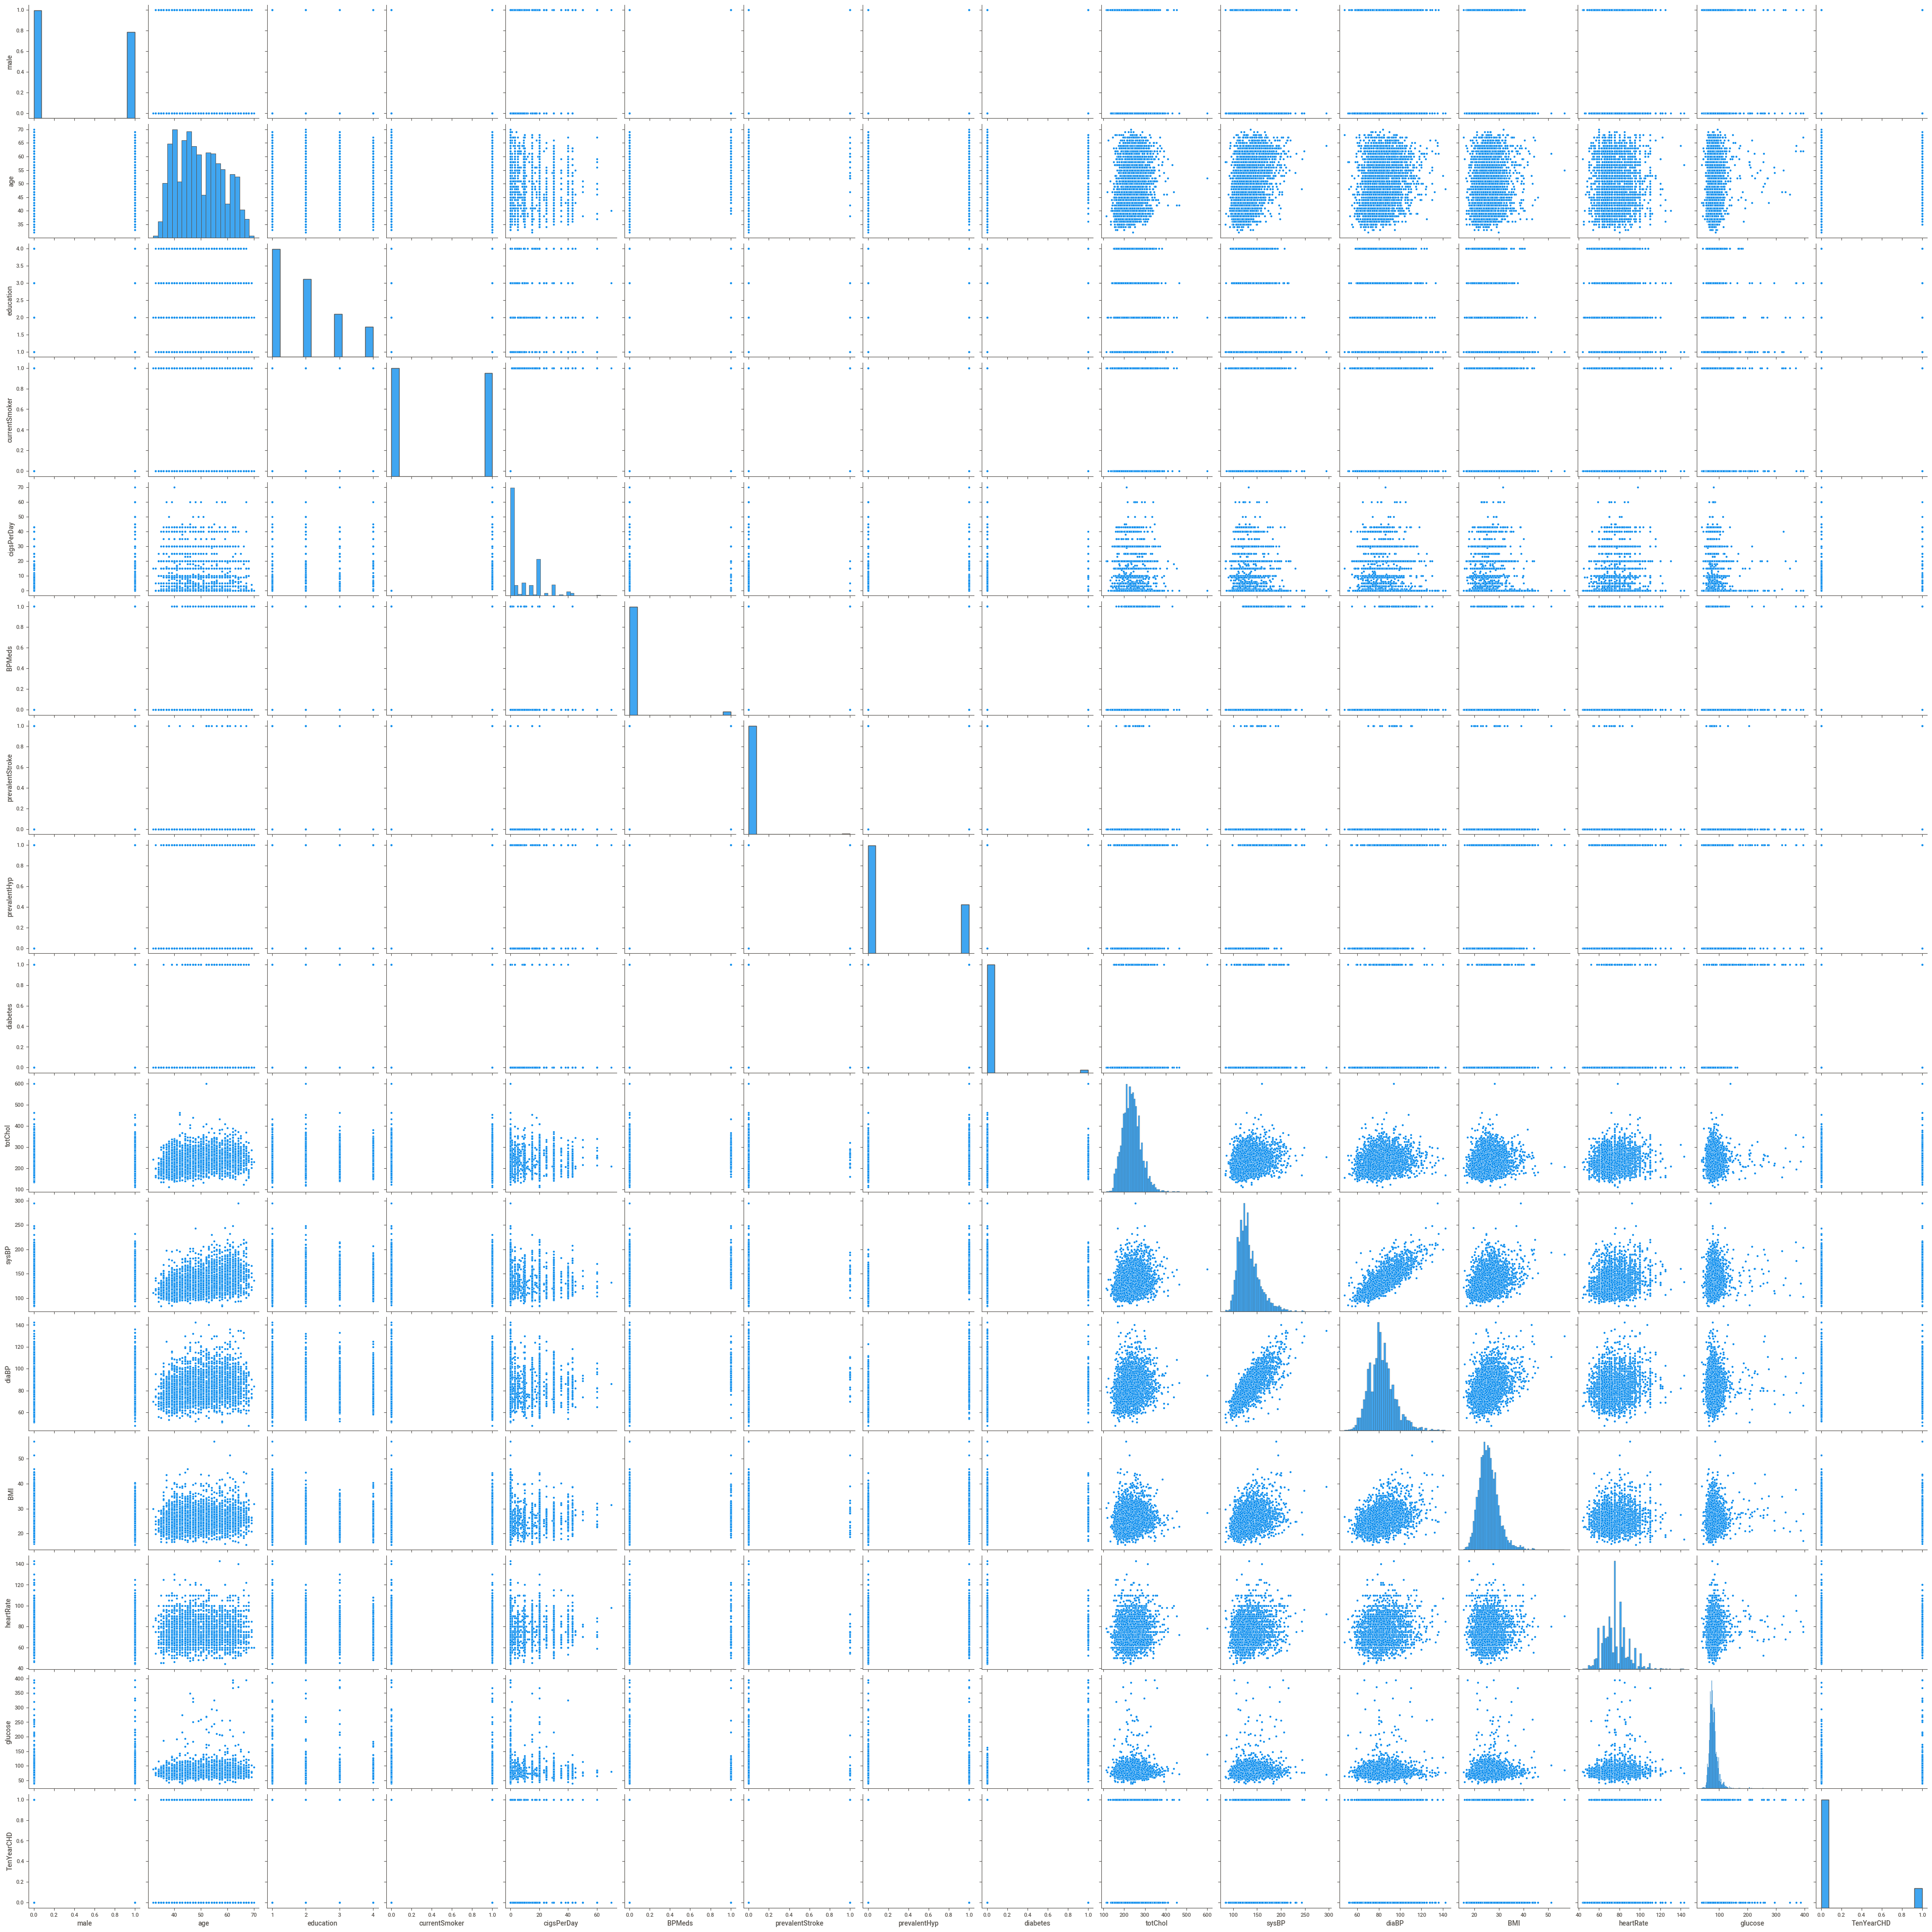

In [ ]:
#plotting seaborn pairplot 
sns.pairplot(HDdf_no_nan)

**Principal Component Analysis (PCA)**

Sometimes we have datasets with a lot of colums and it is difficult to determine which colums to remove from the dataset before fitting it to the machine learning model. Principal Component Analysis (PCA) is a tool that can be used to smartly reduce the dimensionality of dataset while lossing the least amount of information. It also provides and opportunity to speed up the fitting of machine learning algorithms.  Principal componenet analysis can also be used for data visualisation. 


The next stage is to employ PCA to reduce the dimensionality of the dataset and then fitt the data to LogisticRegression model

In [ ]:
HDdf_no_nan.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# first we need to split the dataset into x, which is the feautures variables and y, which is the target variable

X = HDdf_no_nan [['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']].values
y = HDdf_no_nan ['TenYearCHD'].values

In [ ]:
# fitting the feautures variable X into principal components and specifying the dimensions to be reduced to 2
pca = PCA(n_components=2)

# Fit and transform the data

pca.fit(X)
Xn = pca.transform(X)

In [ ]:
#printing the transformed data
Xn

array([[-46.69541156, -16.08012116],
       [ 11.26475974, -11.42956683],
       [  6.21878809, -14.39211297],
       ...,
       [ 82.63586433,  20.75396763],
       [-31.83183157, -12.65875483],
       [ 33.2243979 ,  14.86357046]])

In [ ]:
#checking the number of rows and columns of the transformed data
Xn.shape

(3656, 2)

In [ ]:
# pca transformed data is in np array, we therefore need to create a new dataframe 

newdf = pd.DataFrame(data=np.c_[Xn, y], columns=['Feature 1', 'Feature 2', 'Result'])

In [ ]:
newdf

,Feature 1,Feature 2,Result
0,-46.695412,-16.080121,0.0
1,11.264760,-11.429567,0.0
2,6.218788,-14.392113,0.0
3,-6.970616,29.907316,1.0
4,46.988497,-6.722415,0.0
...,...,...,...
3651,-47.066179,13.536368,0.0
3652,-52.733596,33.010886,1.0
3653,82.635864,20.753968,1.0
3654,-31.831832,-12.658755,0.0


In [ ]:
#creating a visualisation for the data
#fig = px.scatter(newdf, x='Feature 1', y='Feature 2', color='Result')
#fig.show()
fig = px.scatter(newdf, x='Feature 1', y='Feature 2', color='Result')
fig.show()

In [ ]:
# 3D plotting of data. This plot will help us visualise the 'results' and see the difference in the distribution

import plotly.graph_objs as go
points_colorscale = [
                     [0.0, 'rgb(239, 85, 59)'],
                     [1.0, 'rgb(99, 110, 250)'],
                    ]

layout = go.Layout(scene=dict(
                              xaxis=dict(title='Feature 1'),
                              yaxis=dict(title='Featrue 2'),
                              zaxis=dict(title='Result')
                             ),
                  )

points = go.Scatter3d(x=newdf['Feature 1'], 
                      y=newdf['Feature 2'], 
                      z=y,
                      mode='markers',
                      text=newdf['Result'],
                      marker=dict(
                                  size=3,
                                  color=y,
                                  colorscale=points_colorscale
                            ),
                     )

fig2 = go.Figure(data=[points], layout=layout)
fig2.show()

**Splitting data**

From the new (newdf) dataframe created after applying PCA, we need to create x and y featuresa and then split data into training and test. 

In [ ]:
# first we need to split the dataset into x, which is the feautures variables and y, which is the target variable

Xl= newdf[['Feature 1', 'Feature 2']].values
yl= newdf ['Result'].values

# spliting data into test and train set 70:30 ratio
(X_train, X_test, y_train, y_test) = train_test_split(Xl, yl, test_size=0.3, random_state=0)


In [ ]:
#calling the logistic regression model
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# fitting the training data in the logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#prediting and getting accuracy score for the training set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
clf.score(X_train, y_train)

0.8515044939429465

In [ ]:
#getting accuracy score for the test data.
clf.score(X_test,y_test)

0.845943482224248

The training score have a slightly better accuracy compared to the test score. The performance of the training and test predictions are close, which is a good thing. 